In [1]:
from zoobot.tensorflow.predictions import predict_on_dataset
from zoobot.tensorflow.data_utils import image_datasets
from zoobot.tensorflow.estimators import preprocess, define_model, alexnet_baseline, small_cnn_baseline

import pandas as pd
import numpy as np
import ast
import os
from PIL import Image

In [4]:
file_format = 'png'
unordered_image_paths = predict_on_dataset.paths_in_folder('C:/Users/oryan/Documents/esac-project/cutouts/testing-predictions-tmp-folder/',file_format = file_format)

In [9]:
initial_size = 300
batch_size = 8
raw_image_ds = image_datasets.get_image_dataset([str(x) for x in unordered_image_paths], file_format, initial_size, batch_size)

In [17]:
preprocessing_config = preprocess.PreprocessingConfig(
    label_cols = [],
    input_size = initial_size,
    make_greyscale=True,
    input_channels=1,
    normalise_from_uint8=True
)

In [18]:
image_ds = preprocess.preprocess_dataset(raw_image_ds, preprocessing_config)

In [15]:
checkpoint_loc = r'C:\Users\oryan\Documents\zoobot_new\pretrained-models\replicated_train_only_greyscale_tf\replicated_train_only_greyscale_tf\checkpoint'

In [23]:
resize_size = 224
crop_size = int(0.75 * initial_size)

In [25]:
model = define_model.load_model(
    checkpoint_loc = checkpoint_loc,
    include_top = True,
    input_size = initial_size,
    resize_size = resize_size,
    expect_partial=True,
    crop_size = crop_size
)

In [27]:
predict_on_dataset.predict?

Signature:
predict_on_dataset.predict(
    ds: tensorflow.python.data.ops.dataset_ops.DatasetV2,
    model: keras.engine.training.Model,
    n_samples: int,
    label_cols: List,
    save_loc: str,
)
Docstring:
Make and save predictions by model on image dataset.
Args:
    ds (tf.data.Dataset): dataset yielding batches of (images, id_strs). Preprocessing already applied. id_strs may be the original path to image, or any other galaxy identifier.
    model (tf.keras.Model): trained model with which to make predictions
    n_samples (int): number of repeat predictions. Useful to marginalise over augmentations or MC Dropout.
    label_cols (list): Semantic labels for final model output dimension (e.g. ["smooth", "bar", "merger"]). Only used for output csv/hdf5 notes.
    save_loc (str): path to save csv of predictions.
File:      c:\users\oryan\documents\zoobot_tests\zoobot\zoobot\tensorflow\predictions\predict_on_dataset.py
Type:      function


In [28]:
predict_on_dataset.predict(
    ds = image_ds,
    model=model,
    n_samples=5,
    label_cols = ['interacting'],
    save_loc = r'C:\Users\oryan\Documents\esac-project\predictions\gz-hubble-training-pred.csv'
)

## Checking Results

In [34]:
predictions = pd.read_csv('C:/Users/oryan/Documents/esac-project/predictions/gz-hubble-training-pred.csv', index_col = 0).reset_index()

In [35]:
predictions

,id_str,interacting_pred
0,C:/Users/oryan/Documents/esac-project/cutouts/...,"[2.988428831100464, 3.1345763206481934, 3.6543..."
1,C:/Users/oryan/Documents/esac-project/cutouts/...,"[6.886358261108398, 9.615628242492676, 5.36460..."
2,C:/Users/oryan/Documents/esac-project/cutouts/...,"[8.944631576538086, 7.091606616973877, 7.56981..."
3,C:/Users/oryan/Documents/esac-project/cutouts/...,"[4.024980545043945, 3.4999678134918213, 3.1602..."
4,C:/Users/oryan/Documents/esac-project/cutouts/...,"[1.575539469718933, 1.5682587623596191, 2.0141..."
5,C:/Users/oryan/Documents/esac-project/cutouts/...,"[7.066828727722168, 5.041028022766113, 4.95499..."
6,C:/Users/oryan/Documents/esac-project/cutouts/...,"[3.3511290550231934, 8.63340950012207, 6.64436..."
7,C:/Users/oryan/Documents/esac-project/cutouts/...,"[2.0613322257995605, 3.410909652709961, 2.9555..."
8,C:/Users/oryan/Documents/esac-project/cutouts/...,"[5.60822868347168, 5.479885101318359, 4.836846..."
9,C:/Users/oryan/Documents/esac-project/cutouts/...,"[1.2828091382980347, 1.122755765914917, 1.1547..."


In [42]:
ast.literal_eval(predictions.interacting_pred.iloc[0])

[2.988428831100464,
 3.1345763206481934,
 3.6543796062469482,
 2.5532851219177246,
 2.9271254539489746]

In [66]:
pred_red = (
    predictions
    .assign(pred = predictions.interacting_pred.apply(lambda x: np.mean(ast.literal_eval(x))/10))
    .assign(id = predictions.id_str.apply(lambda x: os.path.basename(x).replace('_300_300.png','')))
)

In [67]:
pred_red

,id_str,interacting_pred,pred,id
0,C:/Users/oryan/Documents/esac-project/cutouts/...,"[2.988428831100464, 3.1345763206481934, 3.6543...",0.305156,AHZ10002i0
1,C:/Users/oryan/Documents/esac-project/cutouts/...,"[6.886358261108398, 9.615628242492676, 5.36460...",0.742976,AHZ10004js
2,C:/Users/oryan/Documents/esac-project/cutouts/...,"[8.944631576538086, 7.091606616973877, 7.56981...",0.779521,AHZ2000a8x
3,C:/Users/oryan/Documents/esac-project/cutouts/...,"[4.024980545043945, 3.4999678134918213, 3.1602...",0.486574,AHZ2000bvu
4,C:/Users/oryan/Documents/esac-project/cutouts/...,"[1.575539469718933, 1.5682587623596191, 2.0141...",0.187052,AHZ2000jxz
5,C:/Users/oryan/Documents/esac-project/cutouts/...,"[7.066828727722168, 5.041028022766113, 4.95499...",0.625823,AHZ2000o3z
6,C:/Users/oryan/Documents/esac-project/cutouts/...,"[3.3511290550231934, 8.63340950012207, 6.64436...",0.590505,AHZ2000spf
7,C:/Users/oryan/Documents/esac-project/cutouts/...,"[2.0613322257995605, 3.410909652709961, 2.9555...",0.289241,AHZ2001c18
8,C:/Users/oryan/Documents/esac-project/cutouts/...,"[5.60822868347168, 5.479885101318359, 4.836846...",0.501591,AHZ2001j4s
9,C:/Users/oryan/Documents/esac-project/cutouts/...,"[1.2828091382980347, 1.122755765914917, 1.1547...",0.121151,AHZ2001j55


In [79]:
pred_binary = pred_red.assign(bin_pred = pred_red.pred.apply(lambda x: 1 if x >= 0.5 else 0 ))

In [80]:
pred_binary

,id_str,interacting_pred,pred,id,bin_pred
0,C:/Users/oryan/Documents/esac-project/cutouts/...,"[2.988428831100464, 3.1345763206481934, 3.6543...",0.305156,AHZ10002i0,0
1,C:/Users/oryan/Documents/esac-project/cutouts/...,"[6.886358261108398, 9.615628242492676, 5.36460...",0.742976,AHZ10004js,1
2,C:/Users/oryan/Documents/esac-project/cutouts/...,"[8.944631576538086, 7.091606616973877, 7.56981...",0.779521,AHZ2000a8x,1
3,C:/Users/oryan/Documents/esac-project/cutouts/...,"[4.024980545043945, 3.4999678134918213, 3.1602...",0.486574,AHZ2000bvu,0
4,C:/Users/oryan/Documents/esac-project/cutouts/...,"[1.575539469718933, 1.5682587623596191, 2.0141...",0.187052,AHZ2000jxz,0
5,C:/Users/oryan/Documents/esac-project/cutouts/...,"[7.066828727722168, 5.041028022766113, 4.95499...",0.625823,AHZ2000o3z,1
6,C:/Users/oryan/Documents/esac-project/cutouts/...,"[3.3511290550231934, 8.63340950012207, 6.64436...",0.590505,AHZ2000spf,1
7,C:/Users/oryan/Documents/esac-project/cutouts/...,"[2.0613322257995605, 3.410909652709961, 2.9555...",0.289241,AHZ2001c18,0
8,C:/Users/oryan/Documents/esac-project/cutouts/...,"[5.60822868347168, 5.479885101318359, 4.836846...",0.501591,AHZ2001j4s,1
9,C:/Users/oryan/Documents/esac-project/cutouts/...,"[1.2828091382980347, 1.122755765914917, 1.1547...",0.121151,AHZ2001j55,0


In [81]:
answers = (
    pd.read_csv(r'C:\Users\oryan\Documents\esac-project\cutouts\hubble-training-100-all\hubble-thumb-manifest-checked.csv',index_col=0)
    .drop(columns=['RA','Dec'])
    .reset_index()
    .rename(columns={'index':'id'})
)

In [82]:
incorrect = pred_binary.merge(answers,on='id',how='left').query('bin_pred != interacting')

In [83]:
incorrect

,id_str,interacting_pred,pred,id,bin_pred,thumbnail_path,interacting
2,C:/Users/oryan/Documents/esac-project/cutouts/...,"[8.944631576538086, 7.091606616973877, 7.56981...",0.779521,AHZ2000a8x,1,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0
4,C:/Users/oryan/Documents/esac-project/cutouts/...,"[1.575539469718933, 1.5682587623596191, 2.0141...",0.187052,AHZ2000jxz,0,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
8,C:/Users/oryan/Documents/esac-project/cutouts/...,"[5.60822868347168, 5.479885101318359, 4.836846...",0.501591,AHZ2001j4s,1,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0


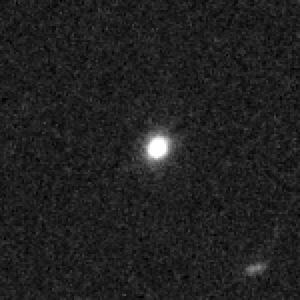

In [85]:
Image.open(incorrect.id_str.iloc[1])